<h1><center>
$\text{Optimizing a Physics-Informed Neural Network (PINN) to solve the Reynolds Equation.}$
</center><h1>
<h2><center>
This code is part of the article "Optimizing a Physics-Informed Neural Network (PINN) to Solve the Reynolds Equation.", Sánchez López, Z., & Díaz Cortés, G. B. (2024). Wrtitten in python from the Matlab version presented in "Fundamentals of physics-informed neural networks applied to solve the Reynolds boundary value problem", Alqmist, A.
</center><h2>


<font size="2">
<b>NOTE</b>: If you use this code in a scientific publication, please cite the following articles:</font>

<font size="2">Almqvist, A. (2021). Fundamentals of physics-informed neural networks applied to solve the Reynolds boundary value problem. Lubricants, 9(8), 82. </font>

<font size="2">Sánchez López, Z., & Díaz Cortés, G. B. (2024). Optimizing a Physics-Informed Neural Network (PINN) to solve the Reynolds Equation. Revista Mexicana de Física, Sociedad Mexicana de Física A.C., Departamento de Física, Universidad Nacional Autónoma de México.</font>




#Methodology of Physics-Informed Neural Networks for Solving PDEs:


The methodology to approximate a PDE with physics-informed neural networks (PINNs) is based on the minimization of the cost function, taking into account the residual form of the PDE, together with the boundary conditions, and initial conditions. The residual form of the PDE is given in Equation (1),

\begin{align}
\mathcal{R}(t,\boldsymbol{x}) =\frac{\partial \boldsymbol{u}(\boldsymbol{x},t)}{\partial t} + \mathcal{N}[\boldsymbol{u}(\boldsymbol{x},t)] = 0, \quad\quad
\boldsymbol{x} \in \boldsymbol{\Omega}, \, t \in [0,T], \tag{1}
\end{align}

subject to the initial (Equation 2) and boundary conditions (Equation 3):

\begin{align}
&\boldsymbol{u}(t=0,\boldsymbol{x}) = \textit{g}(\boldsymbol{x}),&  \boldsymbol{x}\in \boldsymbol{\Omega} \tag{2}\\  
&\mathcal{B}[\boldsymbol{u}(\boldsymbol{x},t)] = 0,  &\boldsymbol{x}\in \boldsymbol\partial{\Omega},\  t \in [0,T]. \tag{3}
\end{align}

In Equation (1), $\mathcal{N}\left[ \cdot \right]$ represents a differential operator (linear or nonlinear), and $\mathcal{B}\left[ \cdot \right]$ is an operator representing the boundary conditions (Dirichlet, Neumann, Robin, or periodic). The vector $\boldsymbol{x}=(\boldsymbol{x_1},\ldots,\boldsymbol{x_d} )\in \boldsymbol{\Omega} $ is the spatial coordinate, that in general could be in $\mathbb{R}^d$, and $t \in[0,T]$ is the temporal coordinate. The spatial domain and the boundary of the domain where the PDE is defined are represented by $\boldsymbol{\Omega},\boldsymbol{\partial\Omega}\in \mathbb{R}^d$, respectively [1],[2],[3].


#PINNs applied to solving the Reynolds Equation:


$\text{Classical one-dimensional steady-state Reynolds equation in the interval}$ $\Omega=[0,1]$.


\begin{align}
\frac{d}{dx} \left( c(x) \frac{dy}{dx} \right)  &= c^{'}(x)y^{'}+ c(x)y^{''} = f(x);\quad 0<x<1,   \tag{4}
\end{align}

where:
\begin{align}
&c(x) = H^{3};\quad H(x) = 1+K-Kx, \tag{4a}  \\
&c^{'}(x) = -3K(1+K-Kx)^{2}, \tag{4b}  \\
&f(x) = \frac{dH}{dx}=-K, \tag{4c}  \\
\end{align}

$\text{with the following boundary conditions: }$ \\
\begin{align}
y(0)=0,\quad y(1)=0 . \tag{6}
\end{align}

$\text{the Reynolds Equation has an analytical solution given by:}$ \\

\begin{equation}
 y_{ex}(x)=\frac{1}{K}\left( \frac{1}{1+K-Kx} - \frac{1+K}{2+K}\frac{1}{(1+K-Kx)^{2}} - \frac{1}{2+K} \right). \tag{7}
\end{equation}

$\text{If we define the operators \( M \) and \( N \) as:}$ \\

\begin{align}
My &= c'(x)y' + c(x)y'', \tag{8} \\
&Ny = \begin{bmatrix} y(0) \\ y(1) \end{bmatrix} =\begin{bmatrix} 0 \\0\end{bmatrix}. \tag{9}
\end{align}

can be rewritten in terms of the operators \( M \) and \( N \) for a given point $x$ in the domain $x\in [0,1]$, as follows:

\begin{align}
My - f &= 0, & 0 < x < 1, \\
Ny - \textbf{b} &= 0,
\end{align}

where $\textbf{b} = \textbf{0}$.

In the PINNs approach, we approximate the solution with the neural network, that is:
\begin{align}
y(x) \approx {y}_{\theta}(x;\boldsymbol{\theta}). \tag{10}
\end{align}



#Architecture of the PINN:
To predict the output $\boldsymbol{u}_\theta(t,\boldsymbol{x}) = y(x)$ of the PINN, we select a vector $\boldsymbol{x}$ containing points within the domain [0,1], which are utilized for training.
The network consists of 1 layer input, where a random element $(x)$ from the vector $\boldsymbol{x}$ is taken as the input value.

This value is then multiplied by all elements of the weight vector $\boldsymbol{w}_i^{(0)}$, and added to a bias vector $\boldsymbol{b}_i^{(0)}$. The result of these operations is then passed through the sigmoid activation function $\varphi$.
Subsequently, the result is multiplied again by another weight vector $\boldsymbol{w}_i^{(1)}$ and a second bias $\boldsymbol{b}_i^{(1)}$ is added.

- Input data set $ \boldsymbol{x} = [x_1, \ldots, x_N] \in \mathbb{R}^N.$
- Vector of real-valued weights for layer (0): $\boldsymbol{w}^{(0)}_i = [w^{(0)}_1, w^{(0)}_2, \ldots, w^{(0)}_N] \in \mathbb{R}^N $.
- Vector of real-valued biases for layer (0): $ \boldsymbol{b}^{(0)}_i = (b^{(0)}_1, b^{(0)}_2, \ldots, b^{(0)}_N) $.
- Sigmoid activation function $ \varphi(\varepsilon) $.
- Output data for layer (0): $ \boldsymbol{z_i(x)} = \varphi(\boldsymbol{w}^{(0)}_i x + \boldsymbol{b}^{(0)}_i), \quad i = 1, \ldots, N $.
- Second weight vector: $ \boldsymbol{w}^{(1)}_i = (w^{(1)}_1, w^{(1)}_2, \ldots, w^{(1)}_N) $.
- Second bias term $ b^{(1)}_i = b^{(1)} $.
- Output data: $ y(x) = \sum_{i=1}^{N}\boldsymbol{w}_i^{(1)}\varphi(\boldsymbol{w}_i^{(0)} x+\boldsymbol{b}_i^{(0)})+b^{(1)} $.

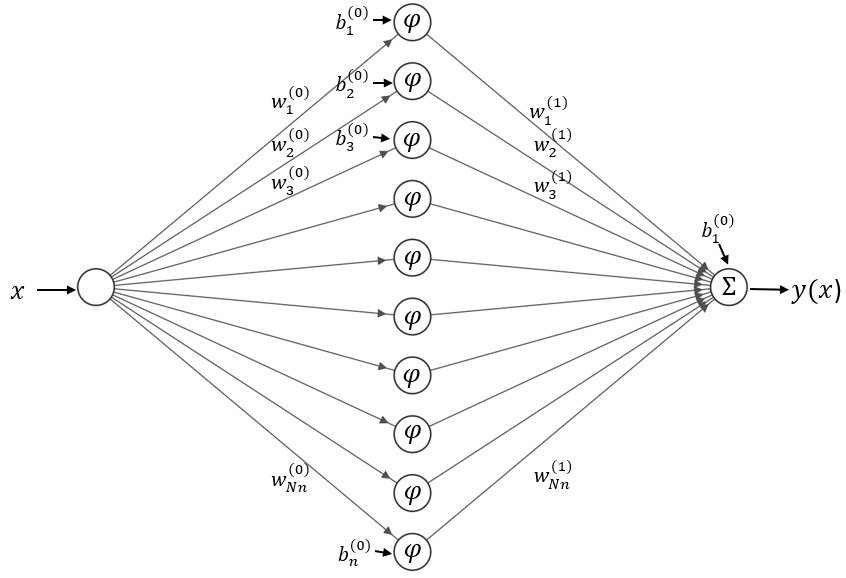



**Activation Function:**
We use the sigmoid function as the activation function, defined as:
\begin{equation}
\label{}
\varphi(\varepsilon) = \frac{1}{1 + e^{-\varepsilon}}, \quad \mathbb{R} \rightarrow [0, 1]. \tag{11}
\end{equation}

The derivatives of which are:

1st Derivative of the Activation Function:
$
\varphi'(\varepsilon) = \varphi(\varepsilon)(1 - \varphi(\varepsilon)) \tag{12}
$

2nd Derivative of the Activation Function:
$
\varphi''(\varepsilon) = \varphi(\varepsilon)(1 - \varphi(\varepsilon))(1 - 2\varphi(\varepsilon)) \tag{13}
$

3rd Derivative of the Activation Function:
$
\varphi'''(\varepsilon) = \varphi(\varepsilon)(1 - \varphi(\varepsilon))^2(1 - 3\varphi(\varepsilon)) \tag{14}
$

```
# ******************************************************************************
# ************************** Activation Function *******************************
# ******************************************************************************
# Sigmoid Activation Function (Equation (11)):
def sigmoid(x):
    y = (1/(1+np.exp(-x)))
    return y
# First derivative of the activation function (Equation (12)):
def dsigmoid(x):
    y = np.multiply((sigmoid(x)),(1-(sigmoid(x))))
    return y
# Second derivative of the activation function (Equation (13)):
def ddsigmoid(x):
    y = np.multiply(dsigmoid(x),(1-2*(sigmoid(x))))
    return y
# Third derivative of the activation function (Equation (14)):
def dddsigmoid(x):
    y = np.multiply(ddsigmoid(x),(1-2*sigmoid(x)))-2*dsigmoid(x)*dsigmoid(x)
    return y
#******************************************************************************    
```





**Cost Function:**

The Cost Function in its general form:

\begin{align}
&\mathcal{L}(\boldsymbol{\theta}) = \left\langle (My-f)^2 \right\rangle + \left( (Ny-\textbf{b})\cdot \textbf{e}_1 \right)^2 + \left( (Ny-\textbf{b})\cdot \textbf{e}_2 \right)^2 , \tag{15}
\end{align}

Where $\langle Q \rangle$ defines the average value of $Q$.

The Cost Function in its particular form:

\begin{equation}
\mathcal{L}(\boldsymbol{\theta}) = \left\langle (c'(x)y' + c(x)y'' - f)^2 \right\rangle + (y(0))^2 + (y(1))^2. \tag{16}
\end{equation}

We need to express the cost function $\mathcal{L}(\boldsymbol{\theta})$ in terms of the weights and biases to establish an explicit relationship with the neural network. Then we have the following expressions:

\begin{align}
y(x) &= b^{(1)} + \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}z_i(x)
  = b^{(1)} + \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}\varphi(\boldsymbol{w}_i^{(0)} x + \boldsymbol{b}_i^{(0)}) \tag{17}
\end{align}
\begin{equation}
y(0) = b^{(1)} + \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}\varphi(\boldsymbol{b}_i^{(0)}) \tag{18}
\end{equation}
\begin{align}
y(1) &= b^{(1)} + \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}\varphi(\boldsymbol{w}_i^{(0)} + \boldsymbol{b}_i^{(0)}) \tag{19}
\end{align}
\begin{align}
y' &= \frac{dy}{dx} = \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}\boldsymbol{w}_i^{(0)}\varphi'(\boldsymbol{w}_i^{(0)} x + \boldsymbol{b}_i^{(0)}) \tag{20}
\end{align}
\begin{align}
y'' &= \frac{d^2y}{dx^2} = \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}(\boldsymbol{w}_i^{(0)})^2\varphi''(\boldsymbol{w}_i^{(0)} x + \boldsymbol{b}_i^{(0)}) \tag{21}
\end{align}


Substituting the equations (18), (19), (20), and (21) into equation (16), we obtain:

\begin{align}
\mathcal{L} &= \left<\left(c'(x) \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}\boldsymbol{w}_i^{(0)}\varphi'(\boldsymbol{w}_i^{(0)} x + \boldsymbol{b}_i^{(0)}) + c(x) \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}(\boldsymbol{w}_i^{(0)})^2\varphi''(\boldsymbol{w}_i^{(0)} x + \boldsymbol{b}_i^{(0)}) - f\right)^2\right> \\
&\quad+ \left(b^{(1)} + \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}\varphi(\boldsymbol{b}_i^{(0)})\right)^2 + \left(b^{(1)} + \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}\varphi(\boldsymbol{w}_i^{(0)}+\boldsymbol{b}_i^{(0)})\right)^2,  \tag{22}
\end{align}

\\
Once we have the cost function expressed in terms of the neural network parameters, and since we want to minimize this function, the next step is to use an algorithm to optimize it. \\
The algorithm we use here is Gradient Descent.


```
# ******************************************************************************
# ************************* Functions for Cost Function ************************
# ******************************************************************************

# First derivative of output y with respect to x: dydx (Equation (20)):
def dy_dx(W1,W0,dzi_z):
    y1 =np.multiply(W0,dzi_z)
    y = np.sum(np.multiply(W1,y1),axis=0)
    return y

# Second derivative of the output with respect to x: d2ydx2 (Equation (21)):
def d2y_dx2(x,W0,W1,dzi_zz):
    N=len(x)
    w02 = w0*w0
    w02_M = np.tile(w02,(N,1)).T
    y1 = np.multiply(w02_M,dzi_zz)
    w1_M  = np.tile(w1,(N,1)).T
    y = np.sum(np.multiply(w1_M,y1),axis = 0)
    return y
#*******************************************************************************

```

**Gradient Descent:**

If we denote by $\boldsymbol{\theta}$ the set of parameters, where $\textbf{w}^L$ and $\textbf{b}^L$  are the weights and biases of the $L^{th}$ layer, then:

\begin{align}
\boldsymbol{\theta} = \{\boldsymbol{w}^1, \boldsymbol{w}^2, \ldots, \boldsymbol{w}^{L}, \boldsymbol{b}^1, \boldsymbol{b}^2, \ldots, \boldsymbol{b}^{L}\}.  
\end{align}

The parameters of the neural network are randomly initialized and updated iteratively by minimizing the loss function $\mathcal{L(\theta)}$ defined in Equation (22).

To compute the gradients, the following formulas are used:  

\begin{align}
\boldsymbol{w}_0 &= \boldsymbol{w}_0-\eta \frac{\partial \mathcal{L}(\boldsymbol{\theta})}{\partial \boldsymbol{w}_i^{(0)}}, &\quad \boldsymbol{w}_1 &= \boldsymbol{w}_1-\eta \frac{\partial \mathcal{L}(\boldsymbol{\theta})}{\partial \boldsymbol{w}_i^{(1)}}, \nonumber  \\
\boldsymbol{b}_0 &= \boldsymbol{b}_0-\eta \frac{\partial \mathcal{L}(\boldsymbol{\theta})}{\partial \boldsymbol{b}_i^{(0)}}, &\quad  
b_1 &= b_1-\eta \frac{\partial \mathcal{L}(\theta)}{\partial b_1^{(0)}}, \tag{23}
\end{align}

where  $\eta$ is an hyperparameter known as the learning rate. \\

The derivatives of the equations (23) are computed analytically by differentiating the equations, which requires the partial derivatives of the general cost function with respect to each weight and bias.



\begin{align}
\frac{\partial \mathcal{L}}{\partial \boldsymbol{w}_i^{(0)}} &= \frac{\partial\langle(My-f)^2\rangle}{\partial \boldsymbol{w}_i^{(0)}} + \frac{\partial((Ny-\textbf{b}) \cdot \textbf{e}_1 )^2}{\partial \boldsymbol{w}_i^{(0)}} + \frac{\partial((Ny-\textbf{b}) \cdot \textbf{e}_2 )^2}{\partial \boldsymbol{w}_i^{(0)}} \\
&= \frac{\partial\langle(c'(x)y' + c(x)y'' - f)^2\rangle}{\partial \boldsymbol{w}_i^{(0)}} + \frac{\partial((y(0)-0))^2}{\partial \boldsymbol{w}_i^{(0)}} + \frac{\partial((y(1)-0))^2}{\partial \boldsymbol{w}_i^{(0)}}, \tag{24}
\end{align}
\begin{align}
\frac{\partial \mathcal{L}}{\partial \boldsymbol{w}_i^{(1)}} &= \frac{\partial\langle(My-f)^2\rangle}{\partial \boldsymbol{w}_i^{(1)}} + \frac{\partial((Ny-\textbf{b}) \cdot \textbf{e}_1 )^2}{\partial \boldsymbol{w}_i^{(1)}} + \frac{\partial((Ny-\textbf{b}) \cdot \textbf{e}_2 )^2}{\partial \boldsymbol{w}_i^{(1)}} \\
&= \frac{\partial\langle(c'(x)y' + c(x)y'' - f)^2\rangle}{\partial \boldsymbol{w}_i^{(1)}} + \frac{\partial((y(0)-0))^2}{\partial \boldsymbol{w}_i^{(1)}} + \frac{\partial((y(1)-0))^2}{\partial \boldsymbol{w}_i^{(1)}}, \tag{25}
\end{align}
\begin{align}
\frac{\partial \mathcal{L}}{\partial \boldsymbol{b}_i^{(0)}} &= \frac{\partial\langle(My-f)^2\rangle}{\partial \boldsymbol{b}_i^{(0)}} + \frac{\partial((Ny-\textbf{b}) \cdot \textbf{e}_1 )^2}{\partial \boldsymbol{b}_i^{(0)}} + \frac{\partial((Ny-\textbf{b}) \cdot \textbf{e}_2 )^2}{\partial \boldsymbol{b}_i^{(0)}} \\
&= \frac{\partial\langle(c'(x)y' + c(x)y'' - f)^2\rangle}{\partial \boldsymbol{b}_i^{(0)}} + \frac{\partial((y(0)-0))^2}{\partial \boldsymbol{b}_i^{(0)}} + \frac{\partial((y(1)-0))^2}{\partial \boldsymbol{b}_i^{(0)}}, \tag{26}
\end{align}
\begin{align}
\frac{\partial \mathcal{L}}{\partial \boldsymbol{b}_1} &= \frac{\partial\langle(My-f)^2\rangle}{\partial \boldsymbol{b}_1} + \frac{\partial((Ny-\textbf{b}) \cdot \textbf{e}_1 )^2}{\partial \boldsymbol{b}_1} + \frac{\partial((Ny-\textbf{b}) \cdot \textbf{e}_2 )^2}{\partial \boldsymbol{b}_1} \\
&= \frac{\partial\langle(c'(x)y' + c(x)y'' - f)^2\rangle}{\partial \boldsymbol{b}_1} + \frac{\partial((y(0)-0))^2}{\partial \boldsymbol{b}_1} + \frac{\partial((y(1)-0))^2}{\partial \boldsymbol{b}_1}, \tag{27}
\end{align}



To compute the derivatives in equations (24), (25), (26), and (27), we need the following expressions:

For equation 24, we need: $\frac{\partial y'}{\partial \boldsymbol{w}_i^{(0)}}$ , $\frac{\partial y''}{\partial \boldsymbol{w}_i^{(0)}}$,$\frac{\partial y(0)}{\partial \boldsymbol{w}_i^{(0)}}$, $\frac{\partial y(1)}{\partial \boldsymbol{w}_i^{(0)}}$

From equations (17), (18), (19), (20), and (21), we have the values of $y(x)$, $y(0)$, $y(1)$, $y'$, and $y''$ respectively. Here, we will need the activation function and its respective derivatives, which are given by equations (11), (12), (13), and (14).

Substituting the values of $y'$, $y''$, $y(0)$, and $y(1)$ and differentiating with respect to $\boldsymbol{w}_i^{(0)}$, we obtain the following:

\begin{equation}
\frac{\partial y'}{\partial \boldsymbol{w}_i^{(0)}} = \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}\varphi'(\boldsymbol{w}_i^{(0)} x + \boldsymbol{b}_i^{(0)}) + \sum_{i=1}^{N} x\boldsymbol{w}_i^{(1)}(\boldsymbol{w}_i^{(0)})^{2}\varphi''(\boldsymbol{w}_i^{(0)} x + \boldsymbol{b}_i^{(0)}), \tag{28}
\end{equation}
\begin{equation}
\frac{\partial y''}{\partial \boldsymbol{w}_i^{(0)}} = \sum_{i=1}^{N} 2\boldsymbol{w}_i^{(1)}\boldsymbol{w}_i^{(0)}\varphi''(\boldsymbol{w}_i^{(0)} x + \boldsymbol{b}_i^{(0)}) + \sum_{i=1}^{N} x\boldsymbol{w}_i^{(1)}(\boldsymbol{w}_i^{(0)})^{2}\varphi'''(\boldsymbol{w}_i^{(0)} x + \boldsymbol{b}_i^{(0)}),\tag{29}
\end{equation}
Since
\begin{equation}
\frac{\partial y(x)}{\partial \boldsymbol{w}_i^{(0)}} = \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}\varphi'(\boldsymbol{w}_i^{(0)} x + \boldsymbol{b}_i^{(0)}) x, \tag{30}
\end{equation}
Then:
\begin{equation}
\frac{\partial y(0)}{\partial \boldsymbol{w}_i^{(0)}} = \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}\varphi'(\boldsymbol{w}_i^{(0)} (0) + \boldsymbol{b}_i^{(0)}) (0)=0, \tag{31}
\end{equation}
\begin{equation}
\frac{\partial y(1)}{\partial \boldsymbol{w}_i^{(0)}} = \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}\varphi'(\boldsymbol{w}_i^{(0)} (1) + \boldsymbol{b}_i^{(0)}) (1) =\sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}\varphi'(\boldsymbol{w}_i^{(0)} + \boldsymbol{b}_i^{(0)}), \tag{32}
\end{equation}

```
# ******************************************************************************
# ********************** Functions for Gradient Descent ************************
# ******************************************************************************

# dy'/dw0 = dy_x_w0 (Equation (28)):
def dydx_dw0(xi,w0,w1,dzi_z,dzi_zz):
    w02 = w0*w0
    w02dy_xx= np.multiply(w02,dzi_zz)
    w1w02dy_xx = np.multiply(w1,w02dy_xx)
    y =np.multiply(w1,dzi_z) + np.multiply(xi,w1w02dy_xx)
    return y

# dy''/dw0 = dy_xx_w0 (Equation (29)):
def dydxx_dw0(w0,w1,dzi_zz,dzi_zzz,xi):
    w02 = w0*w0
    w02dzi_zzz = np.multiply(w02,dzi_zzz)
    w1w02dzi_zzz = np.multiply(w1,w02dzi_zzz)
    y = 2*np.multiply(w1,np.multiply(w0,dzi_zz)) + xi*w1w02dzi_zzz
    return y

#dy0/dw0 = dy0_dw0  (Equation (31)):
def dy0_dw0(w0):
    one = np.ones(np.shape(w0))
    y = 0*one;
    return y

#dy1/dw0 = dy1_dw0 (Equation (32)):
def dy1_dw0(w1,w0,b0):
  y= np.multiply(w1,np.multiply(sigmoid(w0+b0),(1-sigmoid(w0+b0))))
  return y

 ```

For equation 25, we need: $\frac{\partial y'}{\partial \boldsymbol{w}_i^{(1)}}$ , $\frac{\partial y''}{\partial \boldsymbol{w}_i^{(1)}}$,$\frac{\partial y(0)}{\partial \boldsymbol{w}_i^{(1)}}$, $\frac{\partial y(1)}{\partial \boldsymbol{w}_i^{(1)}}$
From equations (17), (18), (19), (20), and (21), we have the values of $y(x)$, $y(0)$, $y(1)$, $y'$, and $y''$ respectively. Here, we will need the activation function and its respective derivatives, which are given by equations (11), (12), (13), and (14).

Substituting the values of $y'$, $y''$, $y(0)$, and $y(1)$ and differentiating with respect to $\boldsymbol{w}_i^{(1)}$, we obtain the following:
\begin{equation}
\frac{\partial y'}{\partial \boldsymbol{w}_i^{(1)}} = \sum_{i=1}^{N} \boldsymbol{w}_i^{(0)}\varphi'(\boldsymbol{w}_i^{(0)} x + \boldsymbol{b}_i^{(0)}), \tag{33}
\end{equation}
\begin{equation}
\frac{\partial y''}{\partial \boldsymbol{w}_i^{(1)}} = \sum_{i=1}^{N} (\boldsymbol{w}_i^{(0)})^2\varphi''(\boldsymbol{w}_i^{(0)} x + \boldsymbol{b}_i^{(0)}), \tag{34}
\end{equation}
Since
\begin{equation}
\frac{\partial y(x)}{\partial \boldsymbol{w}_i^{(1)}} = \sum_{i=1}^{N} \varphi(\boldsymbol{w}_i^{(0)} x + \boldsymbol{b}_i^{(0)}), \tag{35}
\end{equation}
Then:
\begin{equation}
\frac{\partial y(0)}{\partial \boldsymbol{w}_i^{(1)}} = \sum_{i=1}^{N} \varphi(\boldsymbol{w}_i^{(0)} (0) + \boldsymbol{b}_i^{(0)})=\sum_{i=1}^{N} \varphi( \boldsymbol{b}_i^{(0)}) , \tag{36}
\end{equation}
\begin{equation}
\frac{\partial y(1)}{\partial \boldsymbol{w}_i^{(1)}} = \sum_{i=1}^{N} \varphi(\boldsymbol{w}_i^{(0)} (1) + \boldsymbol{b}_i^{(0)})== \sum_{i=1}^{N} \varphi(\boldsymbol{w}_i^{(0)} + \boldsymbol{b}_i^{(0)}), \tag{37}
\end{equation}

```
# ******************************************************************************
# ********************** Functions for Gradient Descent ************************
# ******************************************************************************


# dy'/w1 = dydx_dw1 (Equation (33)):
def dydx_dw1(w0,w1,dzi_z,dzi_zz):
    y = np.multiply(w0,dzi_z)
    return y

# dy''/dw1 = dydxx_dw1 (Equation (34)):
def dydxx_dw1(w0,dzi_zz):
    y = np.multiply(w0*w0,dzi_zz)
    return y

#dy0/dw1=dy0_dw1 (Equation (36)):
def dy0_dw1(b0):
    y = sigmoid(b0)
    return y

#dy1/dw1 = dy1_dw1  (Equation (37)):
def dy1_dw1(w0,b0):
    y = sigmoid(w0+b0)
    return y

```    

For equation 26, we need: $\frac{\partial y'}{\partial \boldsymbol{b}_i^{(0)}}$ , $\frac{\partial y''}{\partial \boldsymbol{b}_i^{(0)}}$,$\frac{\partial y(0)}{\partial \boldsymbol{b}_i^{(0)}}$, $\frac{\partial y(1)}{\partial \boldsymbol{b}_i^{(0)}}$
From equations (17), (18), (19), (20), and (21), we have the values of $y(x)$, $y(0)$, $y(1)$, $y'$, and $y''$ respectively. Here, we will need the activation function and its respective derivatives, which are given by equations (11), (12), (13), and (14).

Substituting the values of $y'$, $y''$, $y(0)$, and $y(1)$ and differentiating with respect to $\boldsymbol{b}_i^{(0)}$, we obtain the following:


\begin{equation}
\frac{\partial y'}{\partial \boldsymbol{b}_i^{(0)}} = \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}\boldsymbol{w}_i^{(0)}\varphi''(\boldsymbol{w}_i^{(0)} x + \boldsymbol{b}_i^{(0)}), \tag{38}
\end{equation}

\begin{equation}
\frac{\partial y''}{\partial \boldsymbol{b}_i^{(0)}} = \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}(\boldsymbol{w}_i^{(0)})^{2}\varphi'''(\boldsymbol{w}_i^{(0)} x + \boldsymbol{b}_i^{(0)}), \tag{39}
\end{equation}

Since
\begin{equation}
\frac{\partial y(x)}{\partial \boldsymbol{b}_i^{(0)}} = \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}\varphi'(\boldsymbol{w}_i^{(0)} x + \boldsymbol{b}_i^{(0)}), \tag{40}
\end{equation}
Then
\begin{equation}
\frac{\partial y(0)}{\partial \boldsymbol{b}_i^{(0)}} = \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}\varphi'(\boldsymbol{w}_i^{(0)} (0) + \boldsymbol{b}_i^{(0)})=\sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}\varphi'(\boldsymbol{b}_i^{(0)}) , \tag{41}
\end{equation}

\begin{equation}
\frac{\partial y(1)}{\partial \boldsymbol{b}_i^{(0)}} = \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}\varphi'(\boldsymbol{w}_i^{(0)} (1) + \boldsymbol{b}_i^{(0)})= \sum_{i=1}^{N} \boldsymbol{w}_i^{(1)}\varphi'(\boldsymbol{w}_i^{(0)} + \boldsymbol{b}_i^{(0)}), \tag{42}
\end{equation}



```
# ******************************************************************************
# ********************** Functions for Gradient Descent ************************
# ******************************************************************************

# dy'/db0 = dydx_db0 (Equation (38)):
def dydx_db0(w1,w0,dzi_zz):
    y = np.multiply(w1,np.multiply(w0,dzi_zz))
    return y

#dy''/db0 = dydxx_db0 (Equation (39)):
def dydxx_db0(w0,w1,dzi_zzz):
    w02dzi_zzz = np.multiply(w0*w0,dzi_zzz)
    y = np.multiply(w1,w02dzi_zzz)
    return y

#dy0/db0=dy0_db0 (Equation (41)):
def dy0_db0(w1,b0):
    y = np.multiply(w1,np.multiply(sigmoid(b0),(1-sigmoid(b0))))
    return y

#dy1/db0 = dy1_db0 (Equation (42)):
def dy1_db0(w1,w0,b0):
    y = np.multiply(w1,np.multiply(sigmoid(w0+b0),(1-sigmoid(w0+b0))))
    return y

```

For equation 27, we need: $\frac{\partial y'}{\partial \boldsymbol{b}_1}$ , $\frac{\partial y''}{\partial \boldsymbol{b}_1}$,$\frac{\partial y(0)}{\partial \boldsymbol{b}_1}$, $\frac{\partial y(1)}{\partial \boldsymbol{b}_1}$
From equations (17), (18), (19), (20), and (21), we have the values of $y(x)$, $y(0)$, $y(1)$, $y'$, and $y''$ respectively. Here, we will need the activation function and its respective derivatives, which are given by equations  (11), (12), (13), and (14).

Substituting the values of $y'$, $y''$, $y(0)$, and $y(1)$ and differentiating with respect to $\boldsymbol{b}_1$, we obtain the following:
\begin{equation}
\frac{\partial y'}{\partial b^{(1)}} = 0, \tag{43}
\end{equation}
\begin{equation}
\frac{\partial y''}{\partial b^{(1)}} = 0, \tag{44}
\end{equation}
Since
\begin{equation}
\frac{\partial y(x)}{\partial b^{(1)}} = 1,\tag{45}
\end{equation}
Then:
\begin{equation}
\frac{\partial y(0)}{\partial b^{(1)}} = 1,\tag{46}
\end{equation} \\
\begin{equation}
\frac{\partial y(1)}{\partial b^{(1)}} = 1, \tag{47}
\end{equation} \\

```
# ******************************************************************************
# ********************** Functions for Gradient Descent ************************
# ******************************************************************************

# dy'/db1 = dydx_db1 (Equation (43)):
def dydx_db1():
    y = 0
    return y
# dy''/db1 = dydxx_db1 (Equation (44)):
def dydxx_db1():
    y = 0
    return y

#dy0/db1 = dy0_db1 (Equation (46)):
def dy0_db1():
     y= 1;
     return y
#dy1/db1 =  dy1_db1 (Equation (47)):
def dy1_db1():
    y = 1;
    return y

```


To train the network, a vector **x** is selected with points in the domain [0,1], which will be the points used for training. \\
The network is composed of 1 layer. As input value, a random element from the vector **x** will be taken. This value will be multiplied by all synaptic weights $w_i^{(0)}$ and added with a bias $b_i^{(0)}$. The result of these operations will then be passed through the sigmoid activation function $\phi$. \\
Subsequently, it will be multiplied again by a vector of synaptic weights $w_i^{(1)}$ and added with a second bias $b_i^{(1)}$.
This will give us the network output, $y(x)$

# Numerical Experiments:
 This code reproduces part of Experiment A, where the neural network is trained to solve the Reynolds equation according to the formulas described earlier. As you will observe, the solution does not always converge, so we decided to repeat the process 100 times until convergence was achieved.

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import random
random.seed(10)

#Experiment A:


In [ ]:
# ******************************************************************************
# ************************** Activation Function *******************************
# ******************************************************************************

# Sigmoid Activation Function (Equation (11)):
def sigmoid(x):
    y = (1/(1+np.exp(-x)))
    return y
# First derivative of the activation function (Equation (12)):
def dsigmoid(x):
    y = np.multiply((sigmoid(x)),(1-(sigmoid(x))))
    return y
# Second derivative of the activation function (Equation (13)):
def ddsigmoid(x):
    y = np.multiply(dsigmoid(x),(1-2*(sigmoid(x))))
    return y
# Third derivative of the activation function (Equation (14)):
def dddsigmoid(x):
    y = np.multiply(ddsigmoid(x),(1-2*sigmoid(x)))-2*dsigmoid(x)*dsigmoid(x)
    return y

In [ ]:
# ******************************************************************************
# ************************* Functions for Cost Function ************************
# ******************************************************************************

# First derivative of output y with respect to x: dydx (Equation (20)):
def dy_dx(W1,W0,dzi_z):
    y1 =np.multiply(W0,dzi_z)
    y = np.sum(np.multiply(W1,y1),axis=0)
    return y

# Second derivative of the output with respect to x: d2ydx2 (Equation (21)):
def d2y_dx2(x,W0,W1,dzi_zz):
    N=len(x)
    w02 = w0*w0
    w02_M = np.tile(w02,(N,1)).T
    y1 = np.multiply(w02_M,dzi_zz)
    w1_M  = np.tile(w1,(N,1)).T
    y = np.sum(np.multiply(w1_M,y1),axis = 0)
    return y

In [ ]:
# ******************************************************************************
# ********************** Functions for Gradient Descent ************************
# ******************************************************************************

# dy'/dw0 = dy_x_w0 (Equation (28)):
def dydx_dw0(xi,w0,w1,dzi_z,dzi_zz):
    w02 = w0*w0
    w02dy_xx= np.multiply(w02,dzi_zz)
    w1w02dy_xx = np.multiply(w1,w02dy_xx)
    y =np.multiply(w1,dzi_z) + np.multiply(xi,w1w02dy_xx)
    return y

# dy''/dw0 = dy_xx_w0 (Equation (29)):
def dydxx_dw0(w0,w1,dzi_zz,dzi_zzz,xi):
    w02 = w0*w0
    w02dzi_zzz = np.multiply(w02,dzi_zzz)
    w1w02dzi_zzz = np.multiply(w1,w02dzi_zzz)
    y = 2*np.multiply(w1,np.multiply(w0,dzi_zz)) + xi*w1w02dzi_zzz
    return y

#dy0/dw0 = dy0_dw0  (Equation (31)):
def dy0_dw0(w0):
    one = np.ones(np.shape(w0))
    y = 0*one;
    return y

#dy1/dw0 = dy1_dw0 (Equation (32)):
def dy1_dw0(w1,w0,b0):
  y= np.multiply(w1,np.multiply(sigmoid(w0+b0),(1-sigmoid(w0+b0))))
  return y

# dy'/w1 = dydx_dw1 (Equation (33)):
def dydx_dw1(w0,w1,dzi_z,dzi_zz):
    y = np.multiply(w0,dzi_z)
    return y

# dy''/dw1 = dydxx_dw1 (Equation (34)):
def dydxx_dw1(w0,dzi_zz):
    y = np.multiply(w0*w0,dzi_zz)
    return y

#dy0/dw1=dy0_dw1 (Equation (36)):
def dy0_dw1(b0):
    y = sigmoid(b0)
    return y

#dy1/dw1 = dy1_dw1  (Equation (37)):
def dy1_dw1(w0,b0):
    y = sigmoid(w0+b0)
    return y

# dy'/db0 = dydx_db0 (Equation (38)):
def dydx_db0(w1,w0,dzi_zz):
    y = np.multiply(w1,np.multiply(w0,dzi_zz))
    return y

#dy''/db0 = dydxx_db0 (Equation (39)):
def dydxx_db0(w0,w1,dzi_zzz):
    w02dzi_zzz = np.multiply(w0*w0,dzi_zzz)
    y = np.multiply(w1,w02dzi_zzz)
    return y

#dy0/db0=dy0_db0 (Equation (41)):
def dy0_db0(w1,b0):
    y = np.multiply(w1,np.multiply(sigmoid(b0),(1-sigmoid(b0))))
    return y

#dy1/db0 = dy1_db0 (Equation (42)):
def dy1_db0(w1,w0,b0):
    y = np.multiply(w1,np.multiply(sigmoid(w0+b0),(1-sigmoid(w0+b0))))
    return y

# dy'/db1 = dydx_db1 (Equation (43)):
def dydx_db1():
    y = 0
    return y
# dy''/db1 = dydxx_db1 (Equation (44)):
def dydxx_db1():
    y = 0
    return y

#dy0/db1 = dy0_db1 (Equation (46)):
def dy0_db1():
     y= 1;
     return y
#dy1/db1 =  dy1_db1 (Equation (47)):
def dy1_db1():
    y = 1;
    return y


In [ ]:
# ******************************************************************************
# *************************** Prediction function ******************************
# ******************************************************************************
def prediction(x,w0,b0,w1,b1):
    # Reprocessing for vectorization of the output len(x) number of elements.
    Nn = len(w0);
    N  = len(x);

    W0 = np.tile(w0, (N, 1)).T
    B0 = np.tile(b0, (N, 1)).T
    W1 = np.tile(w1, (N, 1)).T
    X  = np.tile(x, (Nn, 1))

    # The prediction of y(x)
    z =  np.multiply(W0,X)+B0
    z_i   = sigmoid(z)
    dzi_z = dsigmoid(z)
    dzi_zz = ddsigmoid(z)

    # The prediction of y(x) (Equation (17))
    y     = np.sum(np.multiply(W1,z_i),axis=0) + b1

    # The prediction of y(0) (Equation (18))
    y0    = np.sum(np.multiply(w1,sigmoid(b0)),axis =0)+b1;

    # The prediction of y(1) (Equation (19))
    y1    = np.sum(np.multiply(w1,sigmoid(w0+b0)),axis =0)+b1;

    # The prediction of dy/dx  (Equation (20))
    dy_x = dy_dx(W1,W0,dzi_z)

    # The prediction of d2y/dx2 (Equation (21))
    dy_xx =  d2y_dx2(x,W0,W1,dzi_zz)

    return y,dy_x,dy_xx,y0,y1

# ******************************************************************************
# ************************* Functions for Cost Function ************************
# ******************************************************************************

# The cost function requires y,dy_x,dy_xx,y0,y1 obtained with prediction()
def costfunction(x,c,cp,f,w0,b0,w1,b1):
    y,dy_x,dy_xx,y0,y1 = prediction(x,w0,b0,w1,b1)
    l = np.mean(np.multiply(np.multiply(c,dy_xx)+ np.multiply(cp,dy_x)-f,np.multiply(c,dy_xx)+ np.multiply(cp,dy_x)-f))+y0**2+y1**2; #Equation (22)
    return l

In [ ]:
# ******************************************************************************
# ************************* Train the neural network ***************************
# ******************************************************************************

def trainnn(x,params,c,cp,f,Nn,lr,Tb,Tt):
    m  = np.shape(x)[0]

    # Explicit weights and bias
    w0 = params[0]
    b0 = params[1]
    w1 = params[2]
    b1 = params[3]
    # Auxiliary vector
    one = np.ones(np.shape(w0))

    # Training loop
    bi = 0;
    costi  = 2*Tt;

    while (bi<=Tb) and (costi>Tt):

        # Pick a random data point
        ri = np.random.randint(0,m); # Random integer between 1 and m
        xi  = x[ri]   # Input data point ri

        ci  = c[ri] # The operator functions at ri
        cpi = cp[ri]
        fi  = f[ri]

        # The prediction of y(x)
        z =  np.multiply(w0,xi)+b0

        z_i   = sigmoid(z)

        dzi_z = dsigmoid(z)
        dzi_zz = ddsigmoid(z)
        dzi_zzz = dddsigmoid(z)

        y     = np.sum(np.multiply(w1,z_i),axis=0)+b1  # The prediction at current batch

        # The prediction of dy/dx
        dy_x  = dy_dx(w1,w0,dzi_z)

        # The prediction of d2y/dx2
        dy_xx = np.sum(np.multiply(w1,np.multiply(w0*w0,dzi_zz)),axis=0)

        # The prediction of y(0)
        y0    = np.sum(np.multiply(w1,sigmoid(b0)),axis=0)+b1

        # The prediction of y(1)
        y1    = np.sum(np.multiply(w1,sigmoid(w0+b0)),axis=0)+b1

        # Partial derivatives of y(x) with respect to weights and biases
        dy_w0 = xi*np.multiply(w1,dzi_z)
        dy_w1 = dzi_z
        dy_b0 = np.multiply(w1,dzi_z)
        dy_b1 = 1;

        # Partial derivatives of dy/dx with respect to weights and biases
        w02 = w0*w0
        w02_dzi_zz = np.multiply(w02,dzi_zz)
        w1w02_dzi_zz = np.multiply(w1,w02_dzi_zz)

        dy_x_w0 = dydx_dw0(xi,w0,w1,dzi_z,dzi_zz)
        dy_x_w1 = dydx_dw1(w0,w1,dzi_z,dzi_zz)
        dy_x_b0 = dydx_db0(w1,w0,dzi_zz)
        dy_x_b1 = dydx_db1()

        # Partial derivatives of d2y/dx2 with respect to weights and biases
        dy_xx_w0 = dydxx_dw0(w0,w1,dzi_zz,dzi_zzz,xi)
        dy_xx_w1 = dydxx_dw1(w0,dzi_zz)
        dy_xx_b0 = dydxx_db0(w0,w1,dzi_zzz)
        dy_xx_b1 = dydxx_db1()

        # Partial derivatives of y(0) with respect to weights and biases
        dy0_w0=dy0_dw0(w0)
        dy0_w1 = dy0_dw1(b0)
        dy0_b0 = dy0_db0(w1,b0)
        dy0_b1 = dy0_db1()

        # Partial derivatives of y(1) with respect to weights and biases
        dy1_w0 = dy1_dw0(w1,w0,b0)
        dy1_w1 = dy1_dw1(w0,b0)
        dy1_b0 = dy1_db0(w1,w0,b0)
        dy1_b1 = dy1_db1()

        # Computing the updates for the weights and biases based on the cost

        Ly     = ci*dy_xx+np.multiply(cpi,dy_x)    # The differential operator

        By     = [y0,y1]               # The boundary operator

        dLy_w0  = ci*dy_xx_w0 + cpi*dy_x_w0;
        dBy0_w0 = dy0_w0;
        dBy1_w0 = dy1_w0;
        dl_w0  = 2*(Ly-fi)*dLy_w0  + 2*(y0)*dBy0_w0 + 2*(y1)*dBy1_w0

        dLy_w1  = ci*dy_xx_w1 + cpi*dy_x_w1;
        dBy0_w1 = dy0_w1;
        dBy1_w1 = dy1_w1;
        dl_w1  = 2*(Ly-fi)*dLy_w1  + 2*(y0)*dBy0_w1  + 2*(y1)*dBy1_w1;

        dLy_b0  = ci*dy_xx_b0 + cpi*dy_x_b0;
        dBy0_b0 = dy0_b0;
        dBy1_b0 = dy1_b0;
        dl_b0  = 2*(Ly-fi)*dLy_b0  + 2*(y0)*dBy0_b0  + 2*(y1)*dBy1_b0;

        dLy_b1  = ci*dy_xx_b1 + cpi*dy_x_b1;
        dBy0_b1 = dy0_b1;
        dBy1_b1 = dy1_b1;
        dl_b1  = 2*(Ly-fi)*dLy_b1  + 2*(y0)*dBy0_b1  + 2*(y1)*dBy1_b1;

        #Equations ("23")
        w0 = w0-lr*dl_w0;
        w1 = w1-lr*dl_w1;
        b0 = b0-lr*dl_b0;
        b1 = b1-lr*dl_b1;

        # Cost function evaluated at the random data point x
        costi = np.mean(np.multiply(Ly-f,Ly-f))+By[0]**2+By[1]**2;
        bi = bi+1;

    bi = bi-1;
    params =[w0,b0,w1,b1]
    return params, costi, bi


In [ ]:
# Main program

Ni = 21; # Number of grid points for the solution domain [0,1]
K = 1; # Slope parameter for the Reynolds equation
# Specification of training parameters
Ne = 2000  # Number of Epochs (1 Epoch contains Tb training batches)
Tb = 300;   # Number of training batches (# or corrections during 1 Epoch)
lr = 0.001; # Learning rate coefficient
Nn = 10;    # Number of nodes in the 1st hidden layer
Tt = 1e-30; # Training tolerance

# Step 0 :Initialisation of weights and bias
w0 = -2 + 4*np.random.rand(Nn);
b0 = -2 + 4*np.random.rand(Nn);
w1 = (-1 + 2*np.random.rand(Nn));
b1 = (-1 +2*np.random.rand(1));

params =[w0,b0,w1,b1];

# Domain
x  = np.linspace(0,1,Ni);
dx = x[2]-x[1];
# Reynolds specific values
H    = (1+K)-K*x; #(Equation (4a))
dHdx = -K*np.ones(Ni);
c    = H**3;    #(Equation (4a))
cp   = 3*H**2.*dHdx; # dc/dx #(Equation (4b))
f    = dHdx; # dH/dx (Equation (4c))

y_paper,dydx_paper,d2ydx2_paper,y0_paper,y1_paper = prediction(x,w0,b0,w1,b1)

# Analytical solution (Equation (7))
P1D = (1/K)*(1/(1+K-K*x) - (1+K)/(2+K)*1/(1+K-K*x)**2-1/(2+K));

# Epoch
epoch = Ne
t0ANN = time.time()
cost  =[]
batch = []
Epo = []
# Training the network
for ii in np.arange( epoch): # Looping Epochs
    [params,costi,bi] = trainnn(x,params,c,cp,f,Nn,lr,Tb,Tt);
    w0 = params[0]
    b0 = params[1]
    w1 = params[2]
    b1 = params[3]
    Epo.append(ii)
    cost.append(costfunction(x,c,cp,f,w0,b0,w1,b1)) # Cost for each epoch
    batch.append(bi)                         # # of batches for each epoch

tANN = time.time() -t0ANN
# Prediction
y,dydx,d2ydx2,y0,y1 = prediction(x,w0,b0,w1,b1)

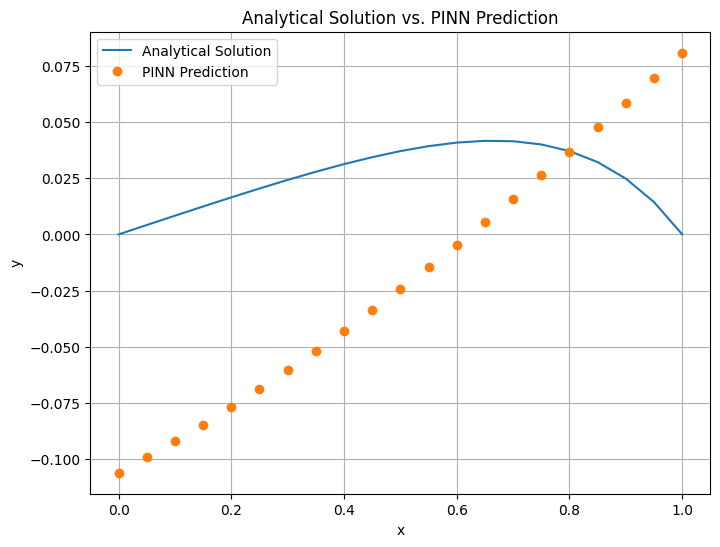

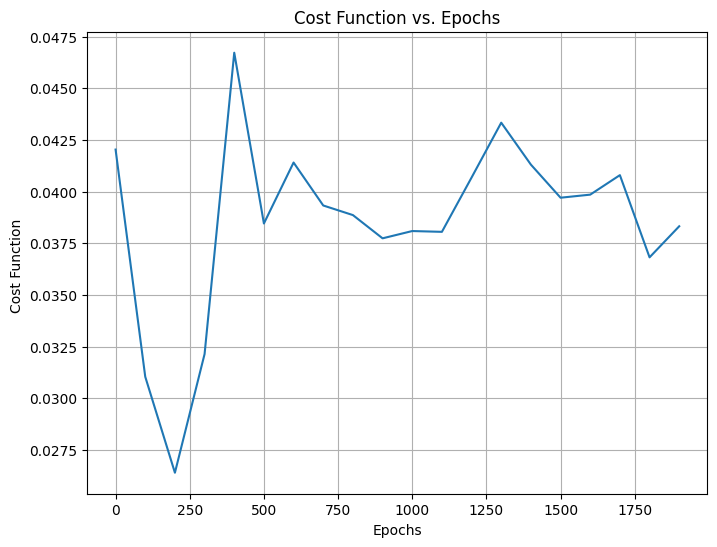

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
plt.title('Analytical Solution vs. PINN Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.plot(x,P1D, label="Analytical Solution")
plt.plot(x,y,'o', label="PINN Prediction")
plt.legend()

plt.figure(figsize=(8, 6))
plt.plot(Epo[0:2000:100], cost[0:2000:100])
plt.title('Cost Function vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost Function ')
plt.grid(True)
plt.show()

### References

[1] M. Raissi, P. Perdikaris, and G. E. Karniadakis, Physics
informed deep learning (part i): Data-driven solutions of
nonlinear partial differential equations, arXiv preprint
arXiv:1711.10561 (2017) \\
[2] M. Raissi, P. Perdikaris, and G. E. Karniadakis, Physics
Informed Deep Learning (Part II): Data-driven Discovery
of Nonlinear Partial Differential Equations, arXiv preprint
arXiv:1711.10566 (2017) \\
[3] M. Raissi, P. Perdikaris, and G. E. Karniadakis, Physicsinformed neural networks: A deep learning framework for solving forward and inverse problems involving nonlinear partial
differential equations, Journal of Computational physics 378
(2019) \\